In [31]:
import pandas as pd
import numpy as np

# Loading the dataset

In [32]:
df=pd.read_csv('Titanic-Dataset.csv')

In [33]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling Null Values

In [35]:
# Check for null values (1 line)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
# Fill null values for 'Embarked' with the mode(1 line)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [37]:
# Drop rows with null values in 'Cabin' (or alternatively, you can fill it with a placeholder) (1 line)
df.dropna(subset='Cabin', inplace=True)

In [38]:
#fill it with a placeholder
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Handling Duplicates

In [39]:
# Check for duplicates (1 line)
df.duplicated().sum()

0

In [40]:
# Drop duplicates if any (1 line)
df=df.drop_duplicates()

# Handling Outliers

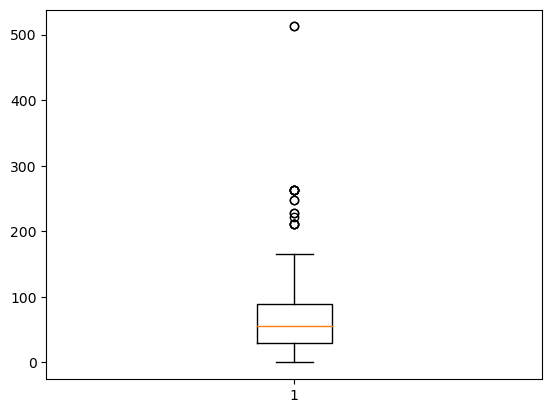

In [41]:
import matplotlib.pyplot as plt
 
#Creating box plot
plt.boxplot(df['Fare'])
 
#show plot
plt.show()

In [42]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare' using the remove_outilers function (1 line)
df = remove_outliers(df, 'Fare')

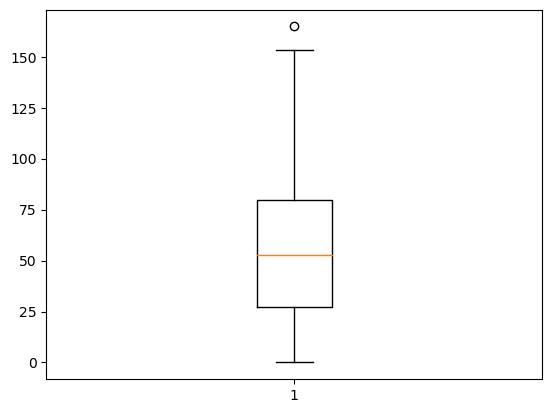

In [43]:
 #Creating box plot
plt.boxplot(df['Fare'])
 
#show plot
plt.show()

# Scaling and Normalization

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
# Standard scaling for 'Fare' (2 lines)
scaler1= StandardScaler()
df['FareScaled']=scaler1.fit_transform(df[['Fare']])

In [46]:
# Min-Max scaling for 'Age' (2 lines)
scaler = MinMaxScaler()
df['AgeScaled'] = scaler.fit_transform(df[['Age']])

In [47]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareScaled,AgeScaled
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0.336381,0.468892
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,-0.137061,0.430956
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,-0.169282,0.671219
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S,-1.084813,0.038948
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,-0.828347,0.721801
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,D56,S,-1.181150,0.418311
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S,-0.595315,0.342438
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.829297,1,0,PC 17569,146.5208,B78,C,2.295351,0.441443
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C,0.478177,0.607992
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.9792,B30,C,0.094129,0.810319


# Encoding Categorical Variables

In [48]:
# One-hot encoding for 'Embarked' and 'Sex' (1 line)
on_hot_Ebarked_Sex=pd.get_dummies(df, columns=['Embarked', 'Sex'])
on_hot_Ebarked_Sex

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FareScaled,AgeScaled,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.336381,0.468892,True,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,-0.137061,0.430956,False,False,True,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,-0.169282,0.671219,False,False,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,-1.084813,0.038948,False,False,True,True,False
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,-0.828347,0.721801,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,-0.151272,0.582701,False,False,True,True,False
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,B51 B53 B55,-1.389448,0.405665,False,False,True,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,0.645572,0.696510,True,False,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,-0.738519,0.228629,False,False,True,True,False


In [49]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

df['Embarked_encoded']= label_encoder.fit_transform(df['Embarked'])

In [50]:
df['Sex_encoded']= label_encoder.fit_transform(df['Sex'])

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareScaled,AgeScaled,Embarked_encoded,Sex_encoded
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.336381,0.468892,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.137061,0.430956,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,-0.169282,0.671219,2,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,-1.084813,0.038948,2,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,-0.828347,0.721801,2,0
